In [1]:
# Data of Greenhouse Gases was collected using a glass flask per month, beginning in the early 1970s. Some of the datasets used only range from 1998 - 2005.
# The following is the average air samples of each greenhouse gas. We can see that Methane greatly outweighs the others. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import numpy as np
import glob
directory = 'Gases'

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [4]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [5]:
# Check Data Name Count 
data_names = len(combined_csv["gas_name"].unique())
data_names

10

In [6]:
# Summary Statistics 
mean = combined_csv.groupby(["gas_name"]).mean()["gas_average"]
median = combined_csv.groupby(["gas_name"]).median()["gas_average"]
variance = combined_csv.groupby(["gas_name"]).var()["gas_average"]
STD = combined_csv.groupby(["gas_name"]).std()["gas_average"]
SEM = combined_csv.groupby(["gas_name"]).sem()["gas_average"]

summary_stat = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":STD, "SEM":SEM})
summary_stat = summary_stat.round(2)
summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
gas_name,,,,,
Carbon D(C13/C12),-8.28,-8.34,0.11,0.34,0.02
Carbon D(O18/O16),-0.66,-0.59,0.16,0.41,0.02
Carbon Dioxide,365.59,362.72,626.64,25.03,1.04
Carbon Monoxide,131.96,129.82,954.66,30.90,1.61
Methane,1858.33,1860.79,3362.24,57.98,2.76
Methane(C13/C12),-47.52,-47.51,0.04,0.20,0.01
Molecular Hydrogen,495.22,497.28,623.95,24.98,1.78
Nitrous Oxide,322.33,322.14,33.02,5.75,0.35
Sulfur Hexafluoride,6.88,6.71,3.28,1.81,0.11


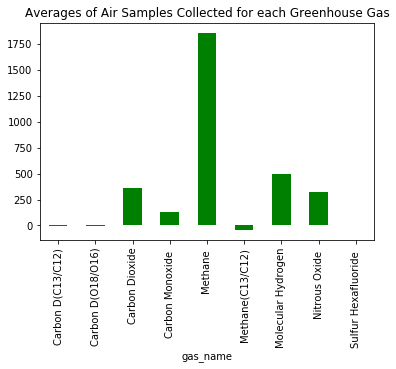

In [7]:
# Bar Chart 
gas_chart = mean
x_axis = gas_chart.index
y_axis = gas_chart.values

gas_chart.plot(kind="bar", color="green", title = "Averages of Air Samples Collected for each Greenhouse Gas")